In [1]:
# Import the dependencies

import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# 6.1.5 - Generate Random World Cities #### 6.1.5 ##### 6.1.5 #### 6.1.5

In [5]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=38a56f5e7442df7604d6e1047cdec936364eafd89635bce94a52358e471c8406
  Stored in directory: c:\users\15124\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [6]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each long and lat combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is *unique*, then we'll add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
#### 6.2.1 #### 6.2.1 #### 6.2.1 #### 6.2.1 #### UNDERSTANDING APIs (Application Programming Interface) #### 6.2.1

In [10]:
#### 6.2.2 #### 6.2.2 #### 6.2.2 #### 6.2.2 #### Get Started with OpenWeatherMap API ### 6.2.2 #### 6.2.2 #### 6.2.2 

In [ ]:
#### 6.2.6 #### 6.2.6 #### 6.2.6 #### 6.2.6 #### Get the City Weather Data #### 6.2.6 #### 6.2.6 #### 6.2.6 #### 6.2.6#### 6.2.6

In [11]:
# Import the rquests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Starting URL for Weather Map API call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e877bd524bfcfb05610fc3908b90ef1


In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | popovo
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | yei
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | zhengjiatun
Processing Record 10 of Set 1 | jatai
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | buala
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | paamiut
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | muli
Processing Record 23 of Set 1 | khani
Processing Record 24 o

City not found. Skipping...
Processing Record 38 of Set 4 | beisfjord
Processing Record 39 of Set 4 | batagay-alyta
Processing Record 40 of Set 4 | grand gaube
Processing Record 41 of Set 4 | itarema
Processing Record 42 of Set 4 | ocampo
Processing Record 43 of Set 4 | kamenka
Processing Record 44 of Set 4 | dongsheng
Processing Record 45 of Set 4 | mantua
Processing Record 46 of Set 4 | siocon
Processing Record 47 of Set 4 | safwah
City not found. Skipping...
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | bereda
Processing Record 50 of Set 4 | nioro
Processing Record 1 of Set 5 | conde
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | honiara
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | zhigansk
Processing Record 6 of Set 5 | san cristobal
Processing Record 7 of Set 5 | sechura
Processing Record 8 of Set 5 | celestun
Processing Record 9 of Set 5 | la asuncion
Processing Record 10 of 

Processing Record 24 of Set 8 | zakamensk
Processing Record 25 of Set 8 | cockburn town
Processing Record 26 of Set 8 | qaqortoq
Processing Record 27 of Set 8 | lachi
Processing Record 28 of Set 8 | liverpool
Processing Record 29 of Set 8 | ambon
Processing Record 30 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 31 of Set 8 | shar
Processing Record 32 of Set 8 | halalo
City not found. Skipping...
Processing Record 33 of Set 8 | port hawkesbury
Processing Record 34 of Set 8 | cayenne
Processing Record 35 of Set 8 | panyutyne
Processing Record 36 of Set 8 | praia
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | shu
Processing Record 39 of Set 8 | sirawai
Processing Record 40 of Set 8 | maldonado
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | manokwari
Processing Record 43 of Set 8 | puro
Processing Record 44 of Set 8 | mookane
Processing Record 45 of Set 8 | casino
Processing Record 46 of Set 8 | libenge
Processing Recor

Processing Record 12 of Set 12 | uyuni
Processing Record 13 of Set 12 | esperance
Processing Record 14 of Set 12 | ialibu
Processing Record 15 of Set 12 | pangai
Processing Record 16 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 17 of Set 12 | svetlyy
Processing Record 18 of Set 12 | vrangel
Processing Record 19 of Set 12 | horasan
Processing Record 20 of Set 12 | hammond
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | san policarpo
Processing Record 23 of Set 12 | goundam
Processing Record 24 of Set 12 | werda
Processing Record 25 of Set 12 | lloydminster
Processing Record 26 of Set 12 | svetlogorsk
Processing Record 27 of Set 12 | ilebo
Processing Record 28 of Set 12 | labuhan
Processing Record 29 of Set 12 | yangjiang
Processing Record 30 of Set 12 | sandwick
Processing Record 31 of Set 12 | beloha
Processing Record 32 of Set 12 | grants
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | kidal
Processing Record 

In [ ]:
# ***What is going on in code above*** ###### # ***What is going on in code above*** ###### ##########

# We create the for loop with the enumerate() method and reference the index and the city in the list.


# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 
# and if the index is greater than or equal to 50. If the statement is true, 
# then the set_count and the record_count are equal to 1.


# Inside the conditional statement, we create the URL endpoint for each city, as before. 
# However, we are removing the blank spaces in the city name
# and concatenating the city name with, city.replace(" ","+"). 
# This will find the corresponding weather data for the city 
# instead of finding the weather data for the first part of the city name.
#   
#       Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).

# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.

# Then we add one to the record count before the next city is processed.

##################### REVIEW CODE OF TRY-EXCEPT BLOCK ######################################

# We parse the JSON file for the current city.
#   If there is no weather data for the city, 
#   i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.


# If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, 
# humidity, cloudiness, wind speed, and date and assign those *values* to **variables**.

#  We could write a try-except block for each one of these parameters 
#  to handle the KeyError if the data wasn't found, but since these parameters 
# are always present in the response this won't be necessary.


# We append the cities list with a dictionary for that city, 
# where the key-value pairs are the values from our weather parameters.

# Finally, below the try block and after the except block, we add the closing print statement, 
# which will let us know the data retrieval has been completed. 
# Make sure that your except block is indented and in line with the try block, 
# and that the print statements are flush with the margin.


# Under the print statement in the except block, we add the ***pass statement***, 
# which is a general purpose statement to handle all errors encountered and to allow the program to continue.

In [15]:
len(city_data)

565

In [ ]:
##### 6.2.7 #### create a DF of City Weather Data #### ##### 6.2.7 #### create a DF of City Weather Data #### ######

In [16]:
# Conver the array of dictionaries to a Pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,69.58,83,95,13.18,PF,2020-08-31 17:23:04
1,Inhambane,-23.86,35.38,68.00,94,75,13.87,MZ,2020-08-31 17:25:23
2,Tiksi,71.69,128.87,41.74,89,0,9.84,RU,2020-08-31 17:25:23
3,Popovo,43.35,26.23,80.60,51,0,4.70,BG,2020-08-31 17:25:24
4,Chokurdakh,70.63,147.92,39.51,88,100,9.31,RU,2020-08-31 17:25:24
5,Yei,4.09,30.68,70.63,91,81,2.35,SS,2020-08-31 17:24:23
6,Mataura,-46.19,168.86,36.59,94,100,3.04,NZ,2020-08-31 17:25:24
7,Bethel,41.37,-73.41,72.00,53,20,6.93,US,2020-08-31 17:23:07
8,Zhengjiatun,43.51,123.51,70.11,93,100,9.62,CN,2020-08-31 17:25:25
9,Jatai,-17.88,-51.71,96.78,14,1,8.66,BR,2020-08-31 17:25:25


In [17]:
# Reorder columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
# new_column_order = ["column2", "column4", "column1"...]
# df = df[new_colum_order]

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]


In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-31 17:23:04,-23.12,-134.97,69.58,83,95,13.18
1,Inhambane,MZ,2020-08-31 17:25:23,-23.86,35.38,68.00,94,75,13.87
2,Tiksi,RU,2020-08-31 17:25:23,71.69,128.87,41.74,89,0,9.84
3,Popovo,BG,2020-08-31 17:25:24,43.35,26.23,80.60,51,0,4.70
4,Chokurdakh,RU,2020-08-31 17:25:24,70.63,147.92,39.51,88,100,9.31
5,Yei,SS,2020-08-31 17:24:23,4.09,30.68,70.63,91,81,2.35
6,Mataura,NZ,2020-08-31 17:25:24,-46.19,168.86,36.59,94,100,3.04
7,Bethel,US,2020-08-31 17:23:07,41.37,-73.41,72.00,53,20,6.93
8,Zhengjiatun,CN,2020-08-31 17:25:25,43.51,123.51,70.11,93,100,9.62
9,Jatai,BR,2020-08-31 17:25:25,-17.88,-51.71,96.78,14,1,8.66


In [19]:
# with the weather_data folder in the World_Weather_Analysis file
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
#### 6.3.1 Plot Lat vs Temp #### 6.3.1 Plot Lat vs Temp #### 6.3.1 Plot Lat vs Temp #### 6.3.1 Plot Lat vs Temp #####

In [36]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/31/20'

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
%matplotlib inline

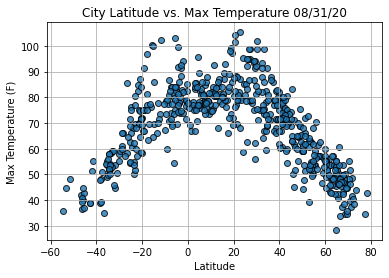

In [40]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

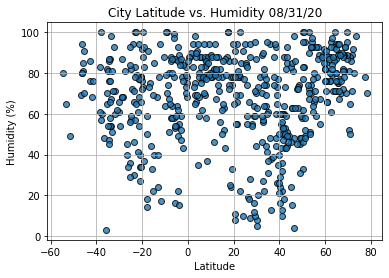

In [42]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show Plot
plt.show()

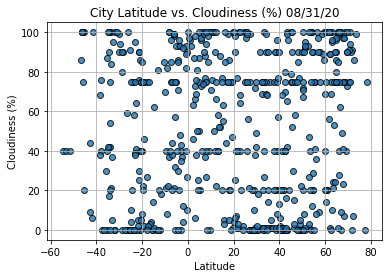

In [43]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show Plot
plt.show()

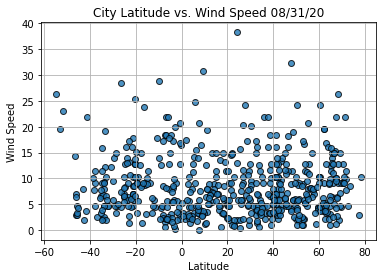

In [44]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show Plot
plt.show()

In [ ]:
#### #### #### 6.4.1 #### Use Linear Regression to find the relationship between Variables ####
#
# 6.4.1 is in random_numbers notebook!!!!!

In [ ]:
##### 6.4.2 ###### ##### 6.4.2 ###### ##### 6.4.2 ###### ##### 6.4.2 ###### ##### 6.4.2 ######

In [45]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [ ]:
#      Perform linear regression.
# (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#      Calculate the regression line "y values" from the slope and intercept.
# regress_values = x_values * slope + intercept

#     Get the equation of the line.
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#    Create a scatter plot of the x and y values.
# plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
# plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
# plt.annotate(line_eq, (10,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Temp')
# plt.show()

In [96]:
# Create a function to perform linear regression on the weather data 
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (-50,15), fontsize=15, color="cyan")
    plt.xlabel('Latitude')
    plt.title("Linear Regression on the Southern Hemisphere for Wind Speed")
    plt.ylabel('Wind Speed')
    plt.show()

In [47]:
# Using *loc* function to generate a new dataframe from the city_data_df dataframe.

index13 = city_data_df.loc[13]
index13

City                    Saskylakh
Country                        RU
Date          2020-08-31 17:25:26
Lat                         71.92
Lng                        114.08
Max Temp                    48.52
Humidity                       71
Cloudiness                     91
Wind Speed                   7.85
Name: 13, dtype: object

In [48]:
# to filter a dataframe based on the value of a row.
# To get all the northern hemisphere latitudes , (those that are equal to or greater than 0) 
# can filter the city_data_df DataFrame using: city_data_df["Lat"] >= 0
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [50]:
# if you want this data in the form of a DataFrame (for lats > = 0) can use **LOC** method on the city_data_df
# add the conditional filter city_data_df["Lat"] >= 0

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tiksi,RU,2020-08-31 17:25:23,71.69,128.87,41.74,89,0,9.84
3,Popovo,BG,2020-08-31 17:25:24,43.35,26.23,80.60,51,0,4.70
4,Chokurdakh,RU,2020-08-31 17:25:24,70.63,147.92,39.51,88,100,9.31
5,Yei,SS,2020-08-31 17:24:23,4.09,30.68,70.63,91,81,2.35
7,Bethel,US,2020-08-31 17:23:07,41.37,-73.41,72.00,53,20,6.93


In [51]:
# Assign above dataframe to northern_hemi_df to access it to perform linear regression.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [54]:
# Do same shit for southern hemisphere - = < 0
city_data_df.loc[(city_data_df["Lat"] < 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-08-31 17:23:04,-23.12,-134.97,69.58,83,95,13.18
1,Inhambane,MZ,2020-08-31 17:25:23,-23.86,35.38,68.00,94,75,13.87
6,Mataura,NZ,2020-08-31 17:25:24,-46.19,168.86,36.59,94,100,3.04
9,Jatai,BR,2020-08-31 17:25:25,-17.88,-51.71,96.78,14,1,8.66
10,Isangel,VU,2020-08-31 17:24:44,-19.55,169.27,66.76,73,22,9.06


In [55]:
# Southern hemi DF with loc function
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Perform Linear Regression on the max temp for the northern hemisphere ####### 6.4.2 #######

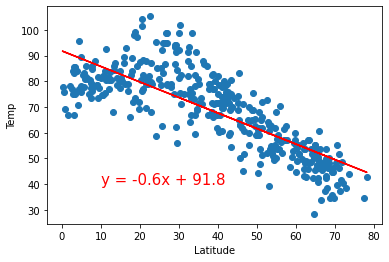

In [61]:
# Linear regression on the Northern Hemisphere  GO UP TO LINEAR REGRESSION CODE IF CONFUSED ###
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

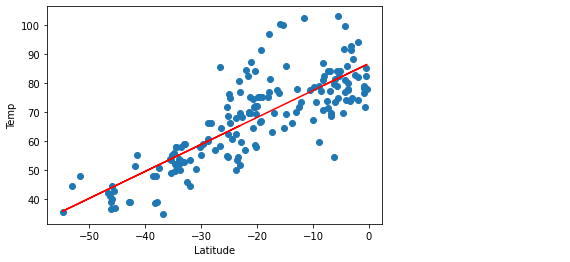

In [69]:
# Linear regression on the southern hemisphere GO UP TO LINEAR REGRESSION CODE IF CONFUSED ###
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
##### 6.4.3 #### Latitude and Humidity #### 6.4.3 ##### 6.4.3 ###### 6.4.3 ######

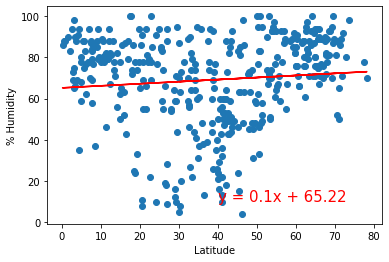

In [76]:
# Linear regression for lat vs humidity #### Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Humidity(%)', 'Humidity (%)',(40,10))

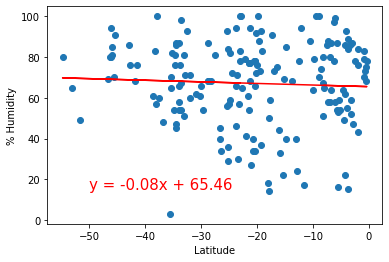

In [80]:
# Linear regression for lat vs humidity #### Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Linear Regression on hte Southern Hemisphere for Humidity (%)", "Humidity", (-50,15))
                     

In [ ]:
#### 6.4.4 ##### #### 6.4.4 ##### #### 6.4.4 ##### Latitude vs. % cloudiness #### 6.4.4 ##### #### 6.4.4 ##### #### 6.4.4 #####

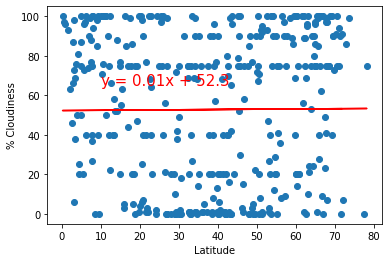

In [85]:
# Linear regression for northern hemisphere- latitude vs cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, title = "Linear Regression on the Nothern Hemisphere for % cloudiness", y_label = "% Cloudiness", text_coordinates = (10,50))

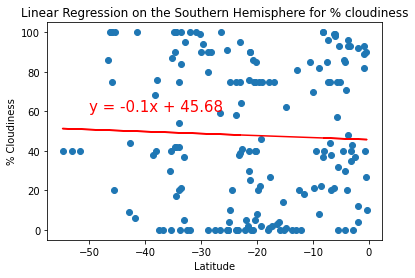

In [88]:
# Linear regression for southern hemisphere- latitude vs cloudiness

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Linear Regression on the Southern Hemisphere for % cloudiness"
y_label = "% Cloudiness"
text_coordinates = (-50,60)
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates = (10,50))

In [ ]:
#### 6.4.5 #### 6.4.5 #### 6.4.5 #### 6.4.5 #### Linear Regression for lat vs. wind speed

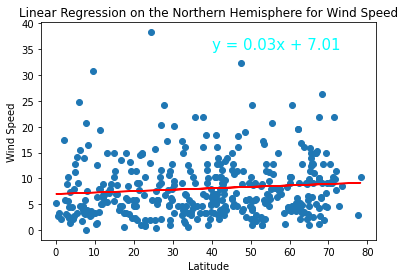

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed", (40,35))

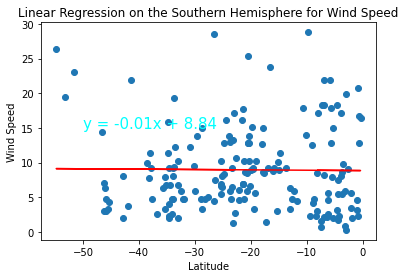

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-40,35))